In [32]:
from Preprocessing import Preprocessing
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [28]:
exoplanets_raw = pd.read_csv('exoplanets.csv')
metadata = pd.read_csv('columns.csv')
targets_mask = metadata['Target'] == 'Yes'
features_mask = metadata['Feature'] == 'Yes'

In [29]:
features = exoplanets_raw.columns[features_mask]
targets = exoplanets_raw.columns[targets_mask]
exoplanets = exoplanets_raw[features.union(targets)]
X = exoplanets[features]
Y = exoplanets[targets]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y['koi_disposition'])
len(X_train.columns)


34

In [30]:
pp = Preprocessing()
mmScaler = MinMaxScaler()
imputer = SimpleImputer(strategy='median')
X_train_mm = pp.fit_transform(mmScaler, imputer, X_train)
X_test_mm = pp.transform(X_test)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
param = {'reg_param':np.linspace(0.1,1,21, endpoint=True)}
qda_gs =  GridSearchCV(qda,param,cv=5, n_jobs=-1, refit=True)
qda_gs.fit(X_train_mm, Y_train['koi_disposition']);


In [ ]:
lda = LinearDiscriminantAnalysis()
lda.best_score_ = np.mean(cross_val_score(lda,X_train_mm,Y_train['koi_disposition'],cv=10))
print(lda.best_score_)
lda.fit(X_train_mm, Y_train['koi_disposition'])

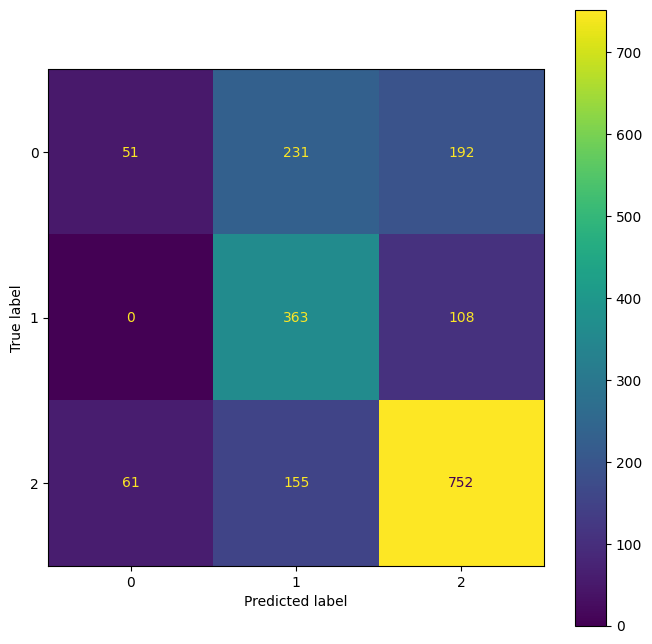

In [37]:
plt.figure(figsize=(8,8));
ConfusionMatrixDisplay.from_estimator(qda_gs, X_test_mm, Y_test['koi_disposition'], display_labels=['0', '1','2'], ax=plt.subplot());